<a href="https://colab.research.google.com/github/Srividhyak2011/Demo-Datascienceproject/blob/main/Tejaswini_M5_MP3_NB_Time_Series_Pollution_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Mini Project Notebook : Time series forecasting of pollution

## Learning Objectives


This experiment predicts pollution w.r.t weather conditions.
At the end of the experiment, you will be able to:

* Perform time series analysis of hourly pollution data
* Implement RNN for time series forecasting using Keras




## Dataset

In [4]:
#@title Download dataset
!gdown "1aVul315gd8gCRqGVjLOvOc8IwbS9m5MW"

Downloading...
From: https://drive.google.com/uc?id=1aVul315gd8gCRqGVjLOvOc8IwbS9m5MW
To: /content/PRSA_data_2010.1.1-2014.12.31.csv
100% 2.01M/2.01M [00:00<00:00, 48.3MB/s]




### Description

In this experiment we use weather and the level of pollution of US embassy in Beijing, China. This is a dataset that reports on the weather and the level of pollution each hour for five years at the US embassy in Beijing, China.

The data includes the date-time, the pollution called PM2.5 concentration, and the weather information including dew point, temperature, pressure, wind direction, wind speed and the cumulative number of hours of snow and rain.

The complete feature list in the raw data is as follows:

1. No: row number
2. year: year of data in this row
3. month: month of data in this row
4. day: day of data in this row
5. hour: hour of data in this row
6. pm2.5: PM2.5 concentration
7. DEWP: Dew Point
8. TEMP: Temperature
9. PRES: Pressure
10. cbwd: Combined wind direction
11. Iws: Cumulated wind speed
12. Is: Cumulated hours of snow
13. Ir: Cumulated hours of rain

We can use this data and frame a forecasting problem where, given the weather conditions and pollution for prior hours, we forecast the pollution at the next hour.

This dataset can be used to frame other forecasting problems.



## Domain Information

 Weather is the state of atmosphere at a particular time and place. It comprises of various components such as wind, temperature, pressure etc. We know from experience that the weather conditions, are similar to the conditions obtaining upto that point of time. In other words, the weather conditions of a day can be predicted by studying the weather conditions of previous days. Hence, it is a perfect example of a time series.

Usually the normal dataset only has observations. But, in time series dataset, there must be one time component.This makes it more complicated and challenging to solve.

**Note:** People often confuse between understanding a time series dataset and predicting the future through dataset. Understanding a time series dataset requires detailed analysis so that you can answer why a particular approach/algorithm is the best fit. While predicting the future, involves considering approaches/algorithms that were used in the historical dataset so that you can use the same and predict the next hour weather.

The power of a time series forecasting model is determined by its performance or accuracy at predicting the future. This is often at the expense of being able to explain why a specific prediction was made, what the confidence intervals are and what are the underlying causes.

## Recurrent Neural Network (RNN)

**Recurrent Neural Networks:**
Humans don’t start their thinking from scratch every second. As you read this essay, you understand each word based on your understanding of previous words. You don’t throw everything away and start thinking from scratch again. Your thoughts have persistence.

Traditional neural networks can’t do this, and it seems like a major shortcoming. For example, imagine you want to classify what kind of event is happening at every point in a movie. It’s unclear how a traditional neural network could use its reasoning about previous events in the film to inform later ones.

**What is a Recurrent Neural Network (RNN)?**

Recurrent neural networks (RNN) are a class of neural networks that are helpful in modeling sequence data. Derived from feedforward networks, RNNs exhibit similar behavior to how human brains function. Simply put: recurrent neural networks produce predictive results in sequential data that other algorithms can’t.


Recurrent neural networks (RNN) are the state of the art algorithm for sequential data and are used by Apple's Siri and Google's voice search. It is the first algorithm that remembers its input, due to an internal memory, which makes it perfectly suited for machine learning problems that involve sequential data. It is one of the algorithms behind the scenes of the amazing achievements seen in deep learning over the past few years. In this post, we'll cover the basic concepts of how recurrent neural networks work, what the biggest issues are and how to solve them.

**When do you need to use a RNN?**

“Whenever there is a sequence of data and that temporal dynamics that connects the data is more important than the spatial content of each individual frame.”

### Importing Required Packages

In [69]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv, DataFrame, concat
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import datetime
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from sklearn.metrics import r2_score

### **Data Preprocessing ( 1 point)**





- The first step is to consolidate the date-time information into a single date-time so that we can use it as an index in Pandas.

- A quick check reveals NA values for pm2.5 for the first 24 hours. We will, therefore, need to remove the first row of data. There are also a few scattered “NA” values later in the dataset. we can mark them with 0 values for now.

- The code below loads the raw dataset and parses the date-time information as the Pandas DataFrame index. The “No” column is dropped and then clearer names are specified for each column. Finally, the NA values are replaced with “0” values and the first 24 hours are removed.


In [55]:
# Load and preprocess the dataset
df=pd.read_csv("/content/PRSA_data_2010.1.1-2014.12.31.csv")

In [58]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [59]:
df.shape

(43824, 13)

Removing first day where NA

In [60]:
df=df[(df["pm2.5"].notna()) & (df["day"]!=1)]

In [61]:
df.shape

(40415, 13)

In [62]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [63]:
df.isna().sum()

No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [65]:
df=df.drop('No',axis=1);
df=df.drop('year',axis=1);
df=df.drop('month',axis=1);
df=df.drop('day',axis=1);
df=df.drop('hour',axis=1);
df.head();

values=df.values;

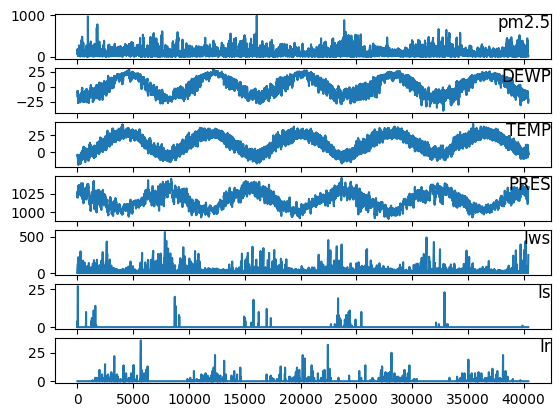

In [71]:
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plotting each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

Dropping pressure as it's highly correlated with Temp and Dewp

###  **Data Visualization ( 2 points)**
Create a quick plot of each series

In [72]:
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')

In [73]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

### **Preparing Data for Time Series Prediction ( 2 points )**

- The first step is to prepare the pollution dataset for the Time Series problem.

- This involves framing the dataset as a supervised learning problem and normalizing the input variables.

- We will frame the supervised learning problem as predicting the pollution at the current hour (t) given the pollution measurement and weather conditions at the prior time step. So, the input is features at time step(t-1) and output is pollution at time t.

- We can transform the dataset using the series_to_supervised() function given in code
- Series to supervised function:

    - Intuition is in time series forecasting terminology the current time (t) and future times (t+1, t+n) are forecast times and past observations (t-1, t-n) are used to make forecasts.
    - We can see how positive and negative shifts can be used to create a new DataFrame from a time series with sequences of input and output patterns for a supervised learning problem.
    - This permits not only classical X -> y prediction, but also X -> Y where both input and output can be sequences.
    - The function takes four arguments:

        1. data: Sequence of observations as a list or 2D NumPy array. Required.
        2. n_in: Number of lag observations as input (X). Values may be between [1..len(data)] Optional. Defaults to 1.
        3. n_out: Number of observations as output (y). Values may be between [0..len(data)-1]. Optional. Defaults to 1.
        4. dropnan: Boolean whether or not to drop rows with NaN values. Optional. Defaults to True.
        5. The function returns Pandas DataFrame of series framed for supervised learning.




        
- Steps to convert the  Time Series to a Supervised Learning Problem are:
    
    1. Load the “pollution.csv” dataset
    2. Label encoded (integer encoded) the wind speed feature
    3. Normalize the Dataset
    4. Transform the dataset into supervised learning problem by calling the function "series_to_supervised"
    


#### Convert the series to supervised learning problem

In [74]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [75]:
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.129779   0.352941   0.245902   0.527273   0.666667   0.002372   
2   0.148893   0.367647   0.245902   0.527273   0.666667   0.003947   
3   0.159960   0.426471   0.229508   0.545454   0.666667   0.005522   
4   0.182093   0.485294   0.229508   0.563637   0.666667   0.008690   
5   0.138833   0.485294   0.229508   0.563637   0.666667   0.010265   

   var7(t-1)  var8(t-1)   var1(t)  
1   0.000000        0.0  0.148893  
2   0.000000        0.0  0.159960  
3   0.000000        0.0  0.182093  
4   0.037037        0.0  0.138833  
5   0.074074        0.0  0.109658  


### Split the Dataset into training and testing data


 Split data into prev 4 years data for training and 1 year of data for testing

In [76]:
values = reframed.values
n_train_hours = 365 * 24*2
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :8], train[:, 8]
test_X, test_y = test[:, :8], test[:, 8]

In [77]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(17520, 1, 8) (17520,) (22894, 1, 8) (22894,)


## Time Series Prediction Techniques

### **Build and compile an RNN/LSTM model ( 3 points )**

In [78]:
model = Sequential()
model.add(LSTM(100, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.3))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(1,activation='linear'))

model.compile(loss='mse', optimizer='adam')

In [79]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            43600     
                                                                 
 dropout (Dropout)           (None, 1, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 50)             30200     
                                                                 
 dropout_1 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 50)             20200     
                                                                 
 dropout_2 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_3 (LSTM)               (None, 50)               

### **Training the RNN on Pollution dataset ( 1 points )**


This is a regression problem. Hence we focus on the loss reduction, instead of accuracy measures to evaluate the model.


In [80]:
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/50
244/244 - 13s - loss: 0.0076 - val_loss: 0.0050 - 13s/epoch - 55ms/step
Epoch 2/50
244/244 - 3s - loss: 0.0017 - val_loss: 0.0023 - 3s/epoch - 13ms/step
Epoch 3/50
244/244 - 3s - loss: 0.0012 - val_loss: 0.0012 - 3s/epoch - 11ms/step
Epoch 4/50
244/244 - 3s - loss: 0.0011 - val_loss: 7.9940e-04 - 3s/epoch - 11ms/step
Epoch 5/50
244/244 - 3s - loss: 0.0010 - val_loss: 6.8962e-04 - 3s/epoch - 14ms/step
Epoch 6/50
244/244 - 3s - loss: 9.6296e-04 - val_loss: 6.4146e-04 - 3s/epoch - 11ms/step
Epoch 7/50
244/244 - 3s - loss: 9.8694e-04 - val_loss: 6.2622e-04 - 3s/epoch - 13ms/step
Epoch 8/50
244/244 - 3s - loss: 9.3953e-04 - val_loss: 6.5649e-04 - 3s/epoch - 11ms/step
Epoch 9/50
244/244 - 3s - loss: 9.2394e-04 - val_loss: 6.5600e-04 - 3s/epoch - 14ms/step
Epoch 10/50
244/244 - 3s - loss: 9.5223e-04 - val_loss: 6.3299e-04 - 3s/epoch - 11ms/step
Epoch 11/50
244/244 - 3s - loss: 8.9728e-04 - val_loss: 6.1879e-04 - 3s/epoch - 13ms/step
Epoch 12/50
244/244 - 3s - loss: 9.4806e-04 - val

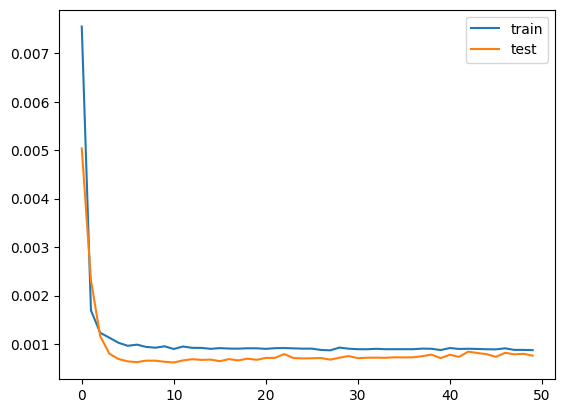

In [81]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### **Testing the model(1 points)**

In [82]:
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

716/716 [==============================] - 3s 2ms/step


In [83]:
# calculate RMSE and MAE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
mae = (mean_absolute_error(inv_y, inv_yhat))
print('Test MAE: %.3f' % mae)

Test RMSE: 27.411
Test MAE: 18.030


Actual : [50. 68. 83. ... 10.  8. 12.]
Predicted: [44.00359  54.749924 70.031204 ... 22.888857 22.898958 21.863394]


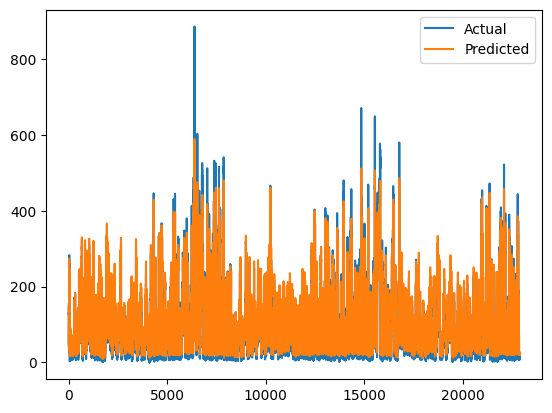

In [85]:
print('Actual :', inv_y)
print('Predicted:', inv_yhat)
# plot history
plt.plot(inv_y, label='Actual')
plt.plot(inv_yhat, label='Predicted')
plt.legend()
plt.show()